In [2]:
import pandas as pd
import numpy as np
import os

# Viz ------------------------------------------------------------
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Date -----------------------------------------------------------
from datetime import datetime
import calendar

# Model ----------------------------------------------------------
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import scipy.stats as ss
from scipy import signal
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Pandas profiling
# from pandas_profiling import ProfileReport

# Functions

In [3]:
def test_stationarity(timeseries):
    # rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # rolling statistics plot
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def decompose_time_series(timeseries, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0, plot_components=True):
    decomposition = seasonal_decompose(timeseries, model=model, filt=filt, period=period, two_sided=two_sided, extrapolate_trend=extrapolate_trend)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    if plot_components:
        plt.figure(figsize=(10,10))

        plt.subplot(411)
        plt.plot(timeseries, label='Original')
        plt.legend(loc='best')
        plt.title("Original Time Series")
        plt.xlabel("Time")
        plt.ylabel("Value")

        plt.subplot(412)
        plt.plot(trend, label='Trend')
        plt.legend(loc='best')
        plt.title("Trend Component")
        plt.xlabel("Time")
        plt.ylabel("Value")

        plt.subplot(413)
        plt.plot(seasonal,label='Seasonality')
        plt.legend(loc='best')
        plt.title("Seasonal Component")
        plt.xlabel("Time")
        plt.ylabel("Value")

        plt.subplot(414)
        plt.plot(residual, label='Residuals')
        plt.legend(loc='best')
        plt.title("Residual Component")
        plt.xlabel("Time")
        plt.ylabel("Value")

        plt.tight_layout()

    return trend, seasonal, residual

# Load Data Set

In [6]:
offer_batt_mean = pd.read_csv('H:\My Drive\QEnergy\Results\Model (S) ARIMA\OFFER_BATT_MEAN.csv', index_col='settlementDate', parse_dates=True)

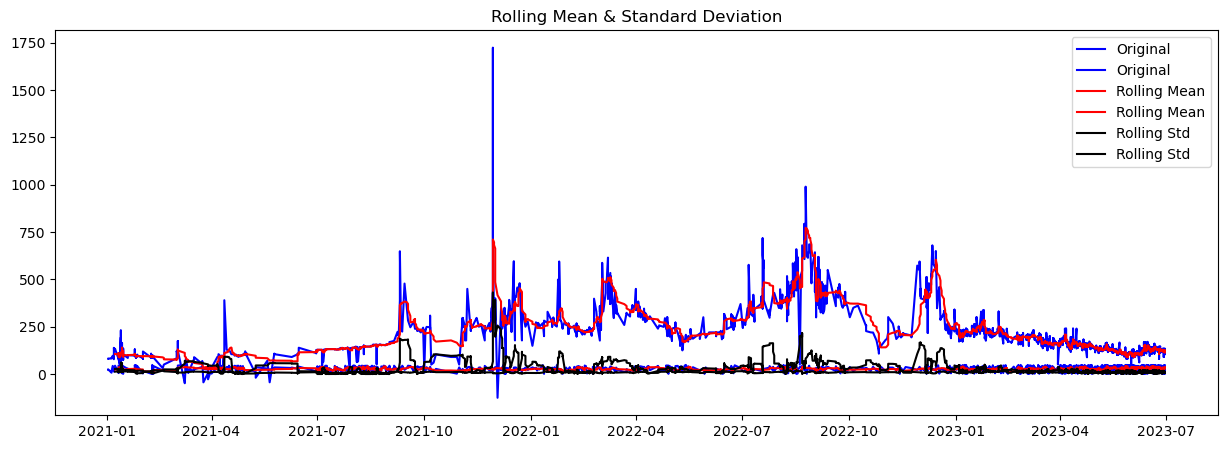

Results of Dickey Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [7]:
test_stationarity(offer_batt_mean)